# Proyecto 2 

## HyBMAP + HPA - Hacking the Human Body



### Situación problemática

El enfoque principal de este tema es identificar y comprender la estructura de cada FTU, o Unidad Funcional de Tejido, en cinco órganos diferentes. Un FTU se describe como un conjunto tridimensional de células que rodean un capilar, con la particularidad de que cada célula dentro de este bloque se encuentra a una distancia de difusión de cualquier otra célula en ese mismo bloque. Esta noción de FTUs y su reconocimiento es esencial para lograr una comprensión más profunda de la organización celular en la composición de estos órganos. Al examinar estos detalles a nivel celular, podemos obtener una visión más completa de cómo los órganos funcionan y se estructuran en su nivel más fundamental.

### Problema científico
La capacidad de reconocer y identificar las Unidades Funcionales de Tejido (FTU) en los órganos del cuerpo es de suma importancia en el campo médico. Este proceso implica la utilización de información proveniente de diversas fuentes, cada una con su propia resolución y enfoque. La razón detrás de esta variedad de fuentes y resoluciones es que refleja la complejidad inherente a la información médica y los desafíos que surgen al trabajar con ella.

Es fundamental abordar los problemas y desafíos inherentes a la calidad de la información. Los datos pueden estar sujetos a ruido, errores de medición y variabilidad interindividual. Identificar FTUs requiere la capacidad de filtrar y procesar esta información de manera efectiva, separando la señal del ruido y corrigiendo posibles imperfecciones en los datos.

### Objetivo general
- Desarrollar algoritmos de segmentación de unidades de tejido funcional (FTUs) que sean capaces de identificar y delinear con precisión las FTUs en imágenes de secciones de tejido de cinco órganos humanos diferentes, generalizando su funcionamiento a través de órganos y siendo robustos ante las variaciones en los conjuntos de datos

### Objetivos específicos
- Limpiar y preparar de manera efectiva la información de las distintas fuentes para poder utilizarla en los algoritmos de segmentación.
- Crear un modelo que tenga una presición del 85% o superior que permita identificar las FTU en los órganos del cuerpo sin importar la resolución de la imagen.

## Descripcion de los datos



- ```id``` - Identificador de la imagen
- ```organ``` - Nombre del órgano al que pertenece la muestra de la biopsia
- ```data_source``` - Si la imagen proviene de HPA o HyBMAP
- ```img_height``` - Altura de la imagen en pixeles
- ```img_width``` - Ancho de la imagen en pixeles
- ```pixel_size``` - Tamaño de los pixeles en micrómetros. Los pixeles de las imágenes de HPA tienen un tamaño de 0.4 micrómetros, mientras que los pixeles de las imágenes de HyBMAP tienen un tamaño de 0.5 micrómetros para riñon, 0.2290 micrómetros para el intestino grueso, 0.7562 micrómetros para pulmón, 0.4945 micrómetros para bazo (spleen) y 6.263 micrómetros para la próstata.
- ```tissue_thickness``` - Grosor del tejido en micrómetros. El grosor del tejido de las imágenes de HPA es de 4 micrómetros, mientras que el grosor del tejido de las imágenes de HyBMAP es de 10 micrómetros para riñon, 8 micrómetros para el intestino grueso, 5 micrómetros para pulmón, 4 micrómetros para bazo (spleen) y 5 micrómetros para la próstata.
- ```rle``` - La columna objetivo. Una copia codificada de las anotaciones. Proporcionado únicamente para el conjunto de entrenamiento.
- ```age``` - Edad del paciente
- ```sex``` - Sexo del paciente

In [6]:
import pandas as pd

train_data = pd.read_csv('./Data/train.csv')

print(train_data.isnull().sum())


id                  0
organ               0
data_source         0
img_height          0
img_width           0
pixel_size          0
tissue_thickness    0
rle                 0
age                 0
sex                 0
dtype: int64


In [9]:
print(train_data.head())


      id     organ data_source  img_height  img_width  pixel_size  \
0  10044  prostate         HPA        3000       3000         0.4   
1  10274  prostate         HPA        3000       3000         0.4   
2  10392    spleen         HPA        3000       3000         0.4   
3  10488      lung         HPA        3000       3000         0.4   
4  10610    spleen         HPA        3000       3000         0.4   

   tissue_thickness                                                rle   age  \
0                 4  1459676 77 1462675 82 1465674 87 1468673 92 14...  37.0   
1                 4  715707 2 718705 8 721703 11 724701 18 727692 3...  76.0   
2                 4  1228631 20 1231629 24 1234624 40 1237623 47 12...  82.0   
3                 4  3446519 15 3449517 17 3452514 20 3455510 24 34...  78.0   
4                 4  478925 68 481909 87 484893 105 487863 154 4908...  21.0   

      sex  
0    Male  
1    Male  
2    Male  
3    Male  
4  Female  


In [23]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                351 non-null    int64  
 1   organ             351 non-null    object 
 2   img_height        351 non-null    float64
 3   img_width         351 non-null    float64
 4   pixel_size        351 non-null    float64
 5   tissue_thickness  351 non-null    float64
 6   rle               351 non-null    object 
 7   age               351 non-null    float64
 8   sex               351 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 24.8+ KB
None


Se puede observar que no hay datos faltantes en el conjunto de datos de entrenamiento y no hay variables que tengan errores de tipo ni de formato por lo que no es necesario realizar una limpieza de datos.

## Análisis Exploratorio

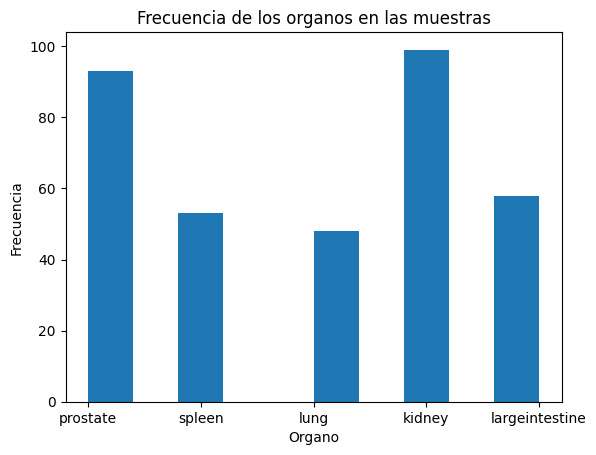

In [13]:
# Histograma de los organos
import matplotlib.pyplot as plt

plt.hist(train_data['organ'], bins=10)
plt.xlabel('Organo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los organos en las muestras')
plt.show()


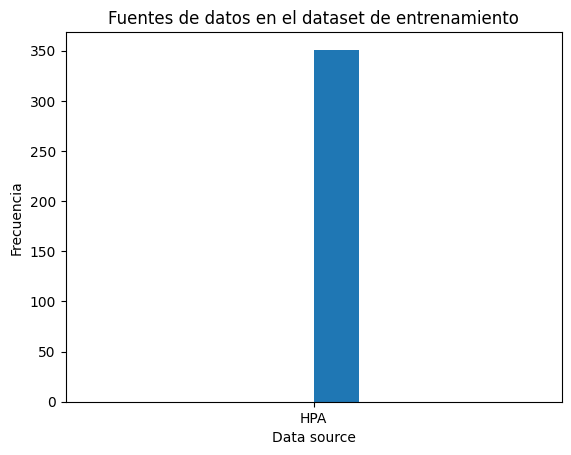

In [15]:
# Data source de las muestras
plt.hist(train_data['data_source'], bins=10)
plt.xlabel('Data source')
plt.ylabel('Frecuencia')
plt.title('Fuentes de datos en el dataset de entrenamiento')
plt.show()

Como solo hay una fuente de datos, se puede eliminar la columna ```data_source``` ya que no aporta información relevante para el análisis.


In [19]:
train_data = train_data.drop(['data_source'], axis=1)

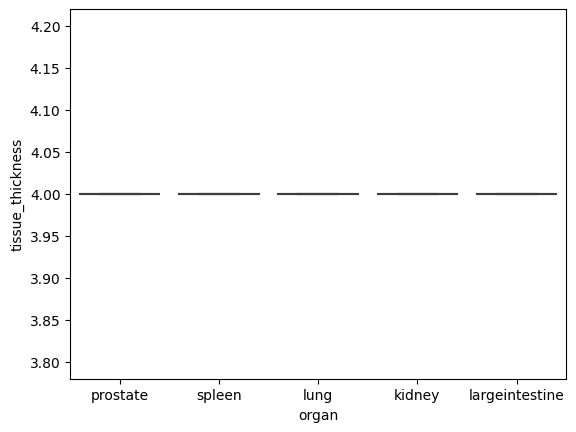

In [24]:
# mostrar relacion entre el organo y el tissue thickness
import seaborn as sns

sns.boxplot(x='organ', y='tissue_thickness', data=train_data)
plt.show()


Como toda la información viene de la misma fuente, todas tienen el mismo tamaño, pixel size y el tissue thickness

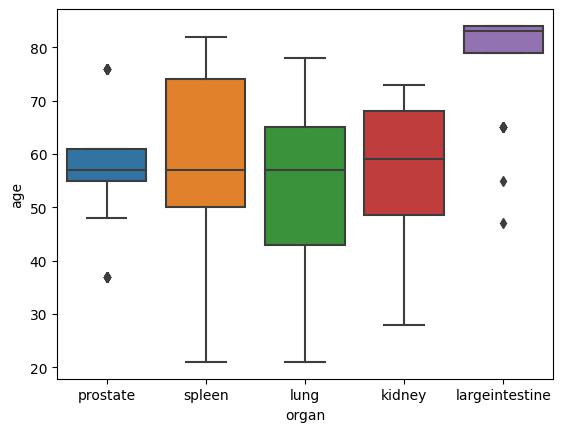

In [29]:
# Diagrama de caja de la edad
sns.boxplot(x='organ', y='age', data=train_data)
plt.show()


Se puede ver que para casi todos los organos la muestra es de un rango de edad parecido, siendo desde los 45 aproximadamente hasta los 75 años, exceptuando del intestino grueso que son de pacientes arriba de ochenta con unos puntos atípicos. Otro que muestra puntos atípicos es de próstata, pero son muy pocos por lo que no afectan a la distribución.

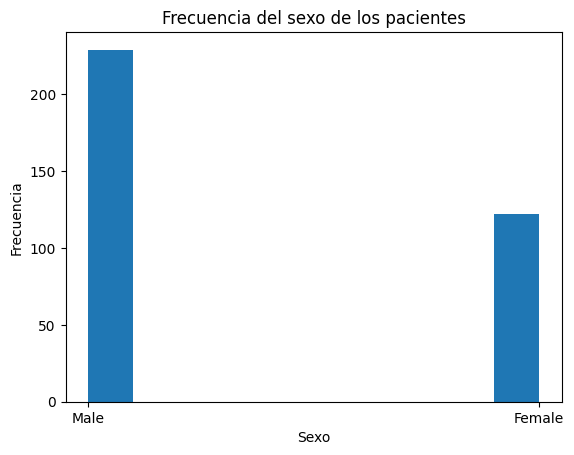

In [28]:
# Histograma de sexo de los pacientes
plt.hist(train_data['sex'], bins=10)
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del sexo de los pacientes')
plt.show()


Se puede observar que la mayoría de las muestras son de hombres, pero hay una cantidad considerable de muestras de mujeres.

## Hallazgos y conclusiones

Como se pudo observar en el análisis exploratorio la información que se obtuvo es bastante específica para el objetivo del proyecto, y ya que toda la información viene de una misma fuente, la mayoría de valores que cambian como el width, height, thickness y pixel size son iguales para todas las muestras. No se puede hacer más modificaciones o limpiezas ya que la información ya está lista para ser procesada y para crear el modelo.

Ya que tenemos un dataset bastante especifico y limpio que contiene información sobre diferentes órganos, los siguientes pasos a seguir es poder identificar los mejores algoritmos con los cuales se pueda realizar el modelo para analizar las imágenes y las coordenadas que se encuentran dadas en las anotaciones de cada dato. Ya con el mejor algoritmo lo que seguiría es crear los modelos y hacer las pruebas respectivas con los mismos para saber cuál tuvo un mejor rendimiento y quedarnos con los resultados del mismo.